In [1]:
import json
from pathlib import Path
import os
import time

import pandas as pd

In [2]:
from pydantic_settings import BaseSettings, SettingsConfigDict

class Settings(BaseSettings):
    model_config = SettingsConfigDict(
        env_file="../.env", env_file_encoding="utf-8", extra="ignore"
    )
    data_dir: str
    docling_model_dir: str
    
settings = Settings()
os.environ["HF_HOME"] = settings.docling_model_dir

In [3]:
import sys
sys.path.append("src")

In [4]:
from core.reader import PDF2ImageReader

In [5]:
# testing on macOS
poppler_path = "/opt/homebrew/Cellar/poppler/25.01.0/bin"
reader = PDF2ImageReader(poppler_path=poppler_path)

In [6]:
pdf_dir = os.path.join(settings.data_dir, "allganize-RAG-Evaluation-Dataset-KO/finance")
pdf_fnames =[x for x in os.listdir(pdf_dir) if x.endswith(".pdf")]
print("num files:", len(pdf_fnames))
pdf_fnames[:10]

num files: 10


['★2019 제1회 증시콘서트 자료집_최종★.pdf',
 '240409(보도자료) 금융위 핀테크 투자 생태계 활성화 나선다.pdf',
 '2024년 3월_3. 향후 통화신용정책 방향.pdf',
 '133178946057443204_WP22-05.pdf',
 '240130(보도자료) 지방은행의 시중은행 전환시 인가방식 및 절차.pdf',
 '130292099630937500_KIFVIP2013-10.pdf',
 '2024년 3월_2. 통화신용정책 운영.pdf',
 '[별첨] 지방은행의 시중은행 전환시 인가방식 및 절차.pdf',
 '240320(보도자료) 금융권의 상생금융 추진현황.pdf',
 '한-호주 퇴직연금 포럼_책자(최종).pdf']

In [7]:
file_path = os.path.join(pdf_dir, pdf_fnames[0])
file_path = "resources/finance-small-images.pdf"
file_path = "/Users/id4thomas/github/nlp_building_blocks/projects/2024_11_arxiver_rag/experiments/2501_1_document_parsing/samples/1706.03762v7.pdf"
# file_path = "resources/1706.03762v7-sample.pdf"
# file_path = "resources/list_group_sample_msword.pdf"
# file_path = "resources/list_group_sample_google.pdf"
document = reader.run(file_path)

In [8]:
nodes = document.nodes
print(len(nodes))

15


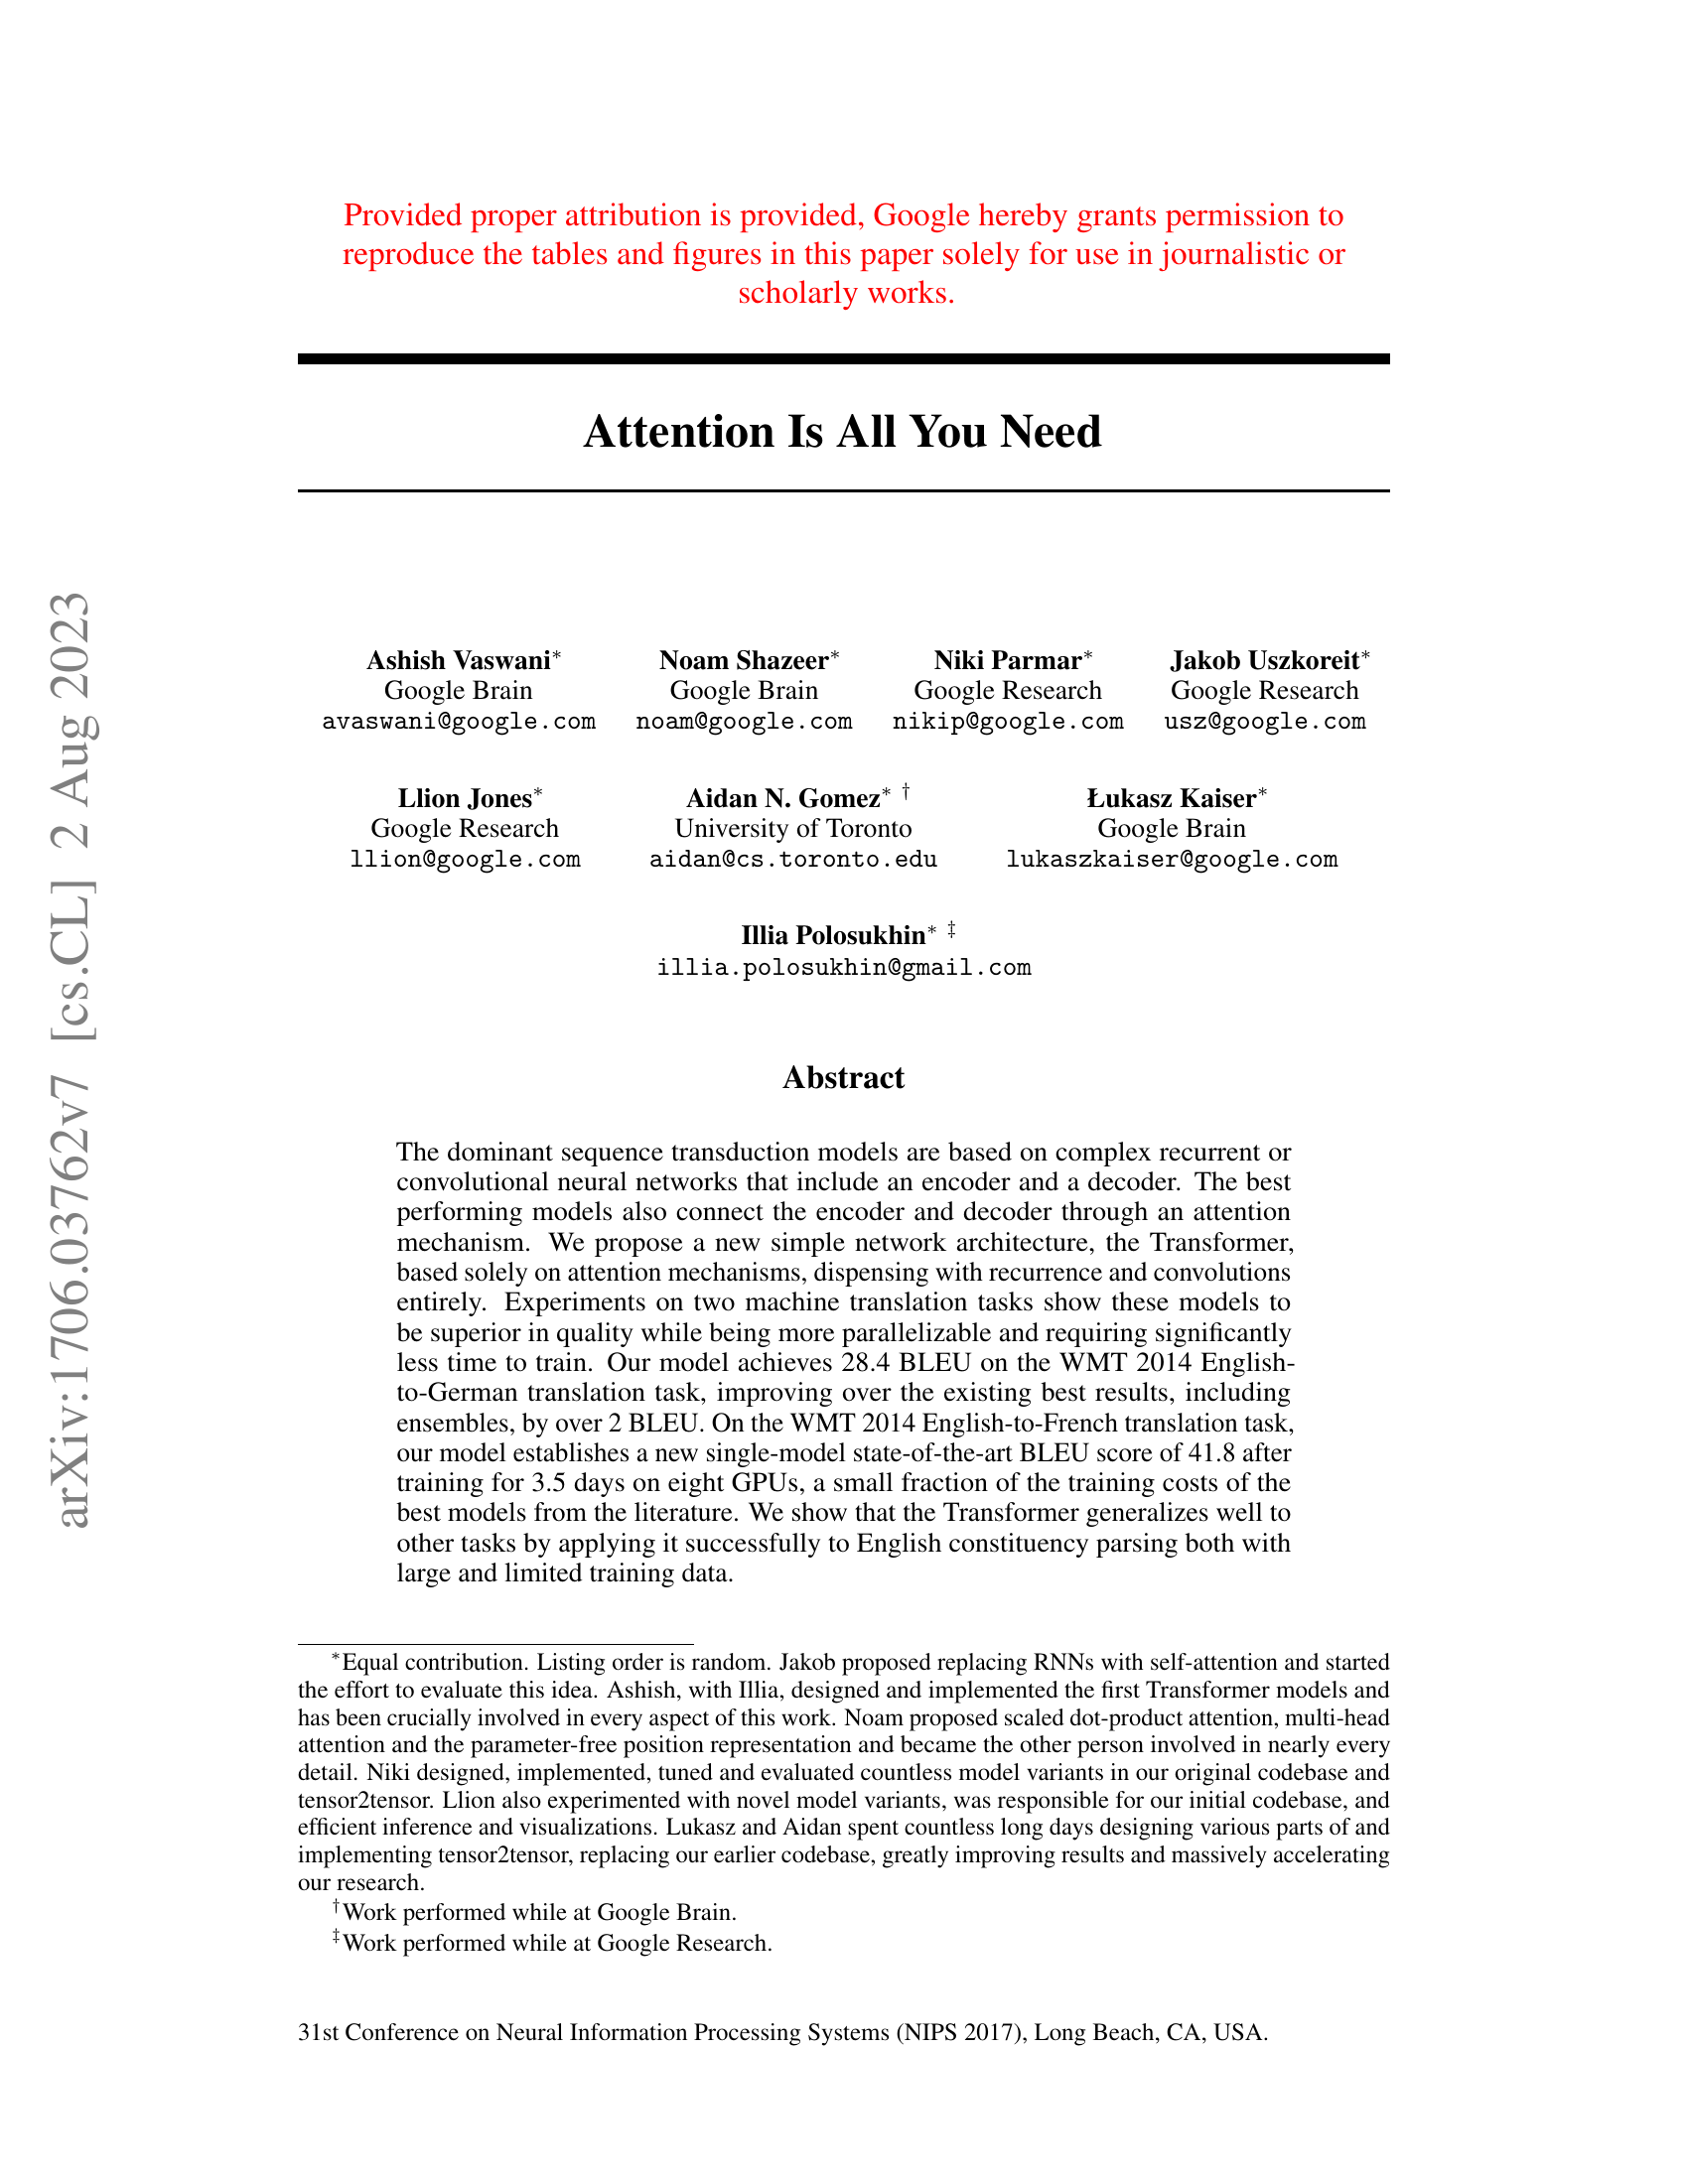

In [10]:
nodes[0].image